In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')
import pandas as pd
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D


Using TensorFlow backend.


In [23]:
df = pd.read_csv('data/AirPassengers.csv')
print(df.dtypes)

Month          object
#Passengers     int64
dtype: object


In [24]:
df.rename(columns = {'Month':'Date','#Passengers':'Passengers'},inplace=True)

In [25]:
residual_df = df.copy()
residual_df["Date"] = pd.to_datetime(df["Date"])
residual_df.set_index("Date",inplace = True)

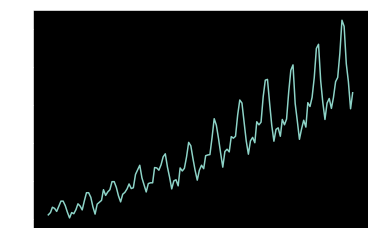

In [26]:
plt.plot(residual_df)

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(residual_df['Passengers'],  
                            model ='additive')
residual = decomposed.resid

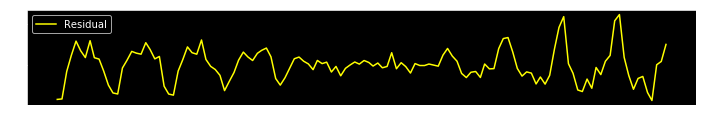

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

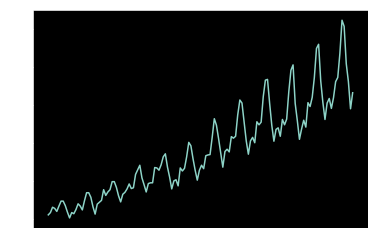

In [29]:
plt.plot(df['Passengers'])

In [21]:
residual_df

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
